# <font style: color='orange'> Practica de regresión con modelos de machine learning </font>

En este notebook practicaremos implementar dos modelos:
1. Support vector regressor
2. Decision trees

Ambos con el dataset mtcars que tiene las siguiente variables:

* mpg - Miles per Gallon
* cyl - # of cylinders
* disp - displacement, in cubic inches
* hp - horsepower
* drat - driveshaft ratio
* wt - weight
* qsec - 1/4 mile time; a measure of acceleration
* vs - 'V' or straight - engine shape
* am - transmission; auto or manual
* gear - # of gears
* carb - # of carburetors.

In [3]:
!wget https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv

--2023-09-11 22:41:14--  https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1700 (1.7K) [text/plain]
Saving to: ‘mtcars.csv.1’

mtcars.csv.1        100%[===================>]   1.66K  --.-KB/s    in 0s      

2023-09-11 22:41:14 (24.9 MB/s) - ‘mtcars.csv.1’ saved [1700/1700]



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [5]:
cars = pd.read_csv('/content/mtcars.csv')

In [11]:
cars.head(3)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [10]:
cars.tail(3)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.77,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.78,18.6,1,1,4,2


In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [13]:
cars.isna().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

### Chequeamos la distribucion o el ajuste de bondad que posee cada variable o columna

In [18]:
#chequear si las variables o columnas tienen distribucion normal (p<0.05) smirnov-kolmogorov
from scipy.stats import shapiro
for i in cars.drop(columns='model'):
  print(i,'->',shapiro(cars[i]))

mpg -> ShapiroResult(statistic=0.9475648403167725, pvalue=0.1228824257850647)
cyl -> ShapiroResult(statistic=0.7533102035522461, pvalue=6.058378858142532e-06)
disp -> ShapiroResult(statistic=0.9200125932693481, pvalue=0.020806454122066498)
hp -> ShapiroResult(statistic=0.9334192276000977, pvalue=0.048807866871356964)
drat -> ShapiroResult(statistic=0.9458838701248169, pvalue=0.11006041616201401)
wt -> ShapiroResult(statistic=0.9432573914527893, pvalue=0.09265287965536118)
qsec -> ShapiroResult(statistic=0.9732509851455688, pvalue=0.5935186743736267)
vs -> ShapiroResult(statistic=0.6322636604309082, pvalue=9.737414785604415e-08)
am -> ShapiroResult(statistic=0.6250743865966797, pvalue=7.836341353595344e-08)
gear -> ShapiroResult(statistic=0.7727859020233154, pvalue=1.3068596672383137e-05)
carb -> ShapiroResult(statistic=0.851097583770752, pvalue=0.0004382486513350159)


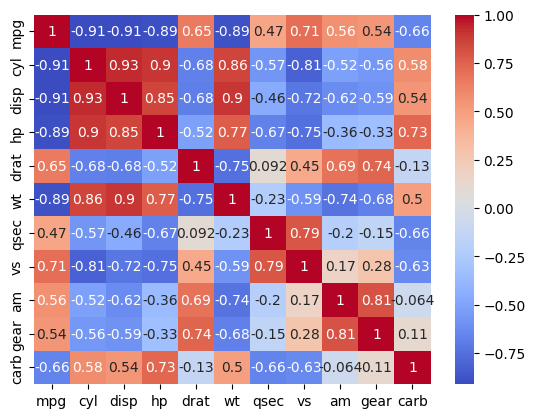

In [19]:
sns.heatmap(cars.drop(columns='model').corr(method='spearman'), cmap='coolwarm', annot=True);

>Nota: la correlacion no **implica** *causalidad*

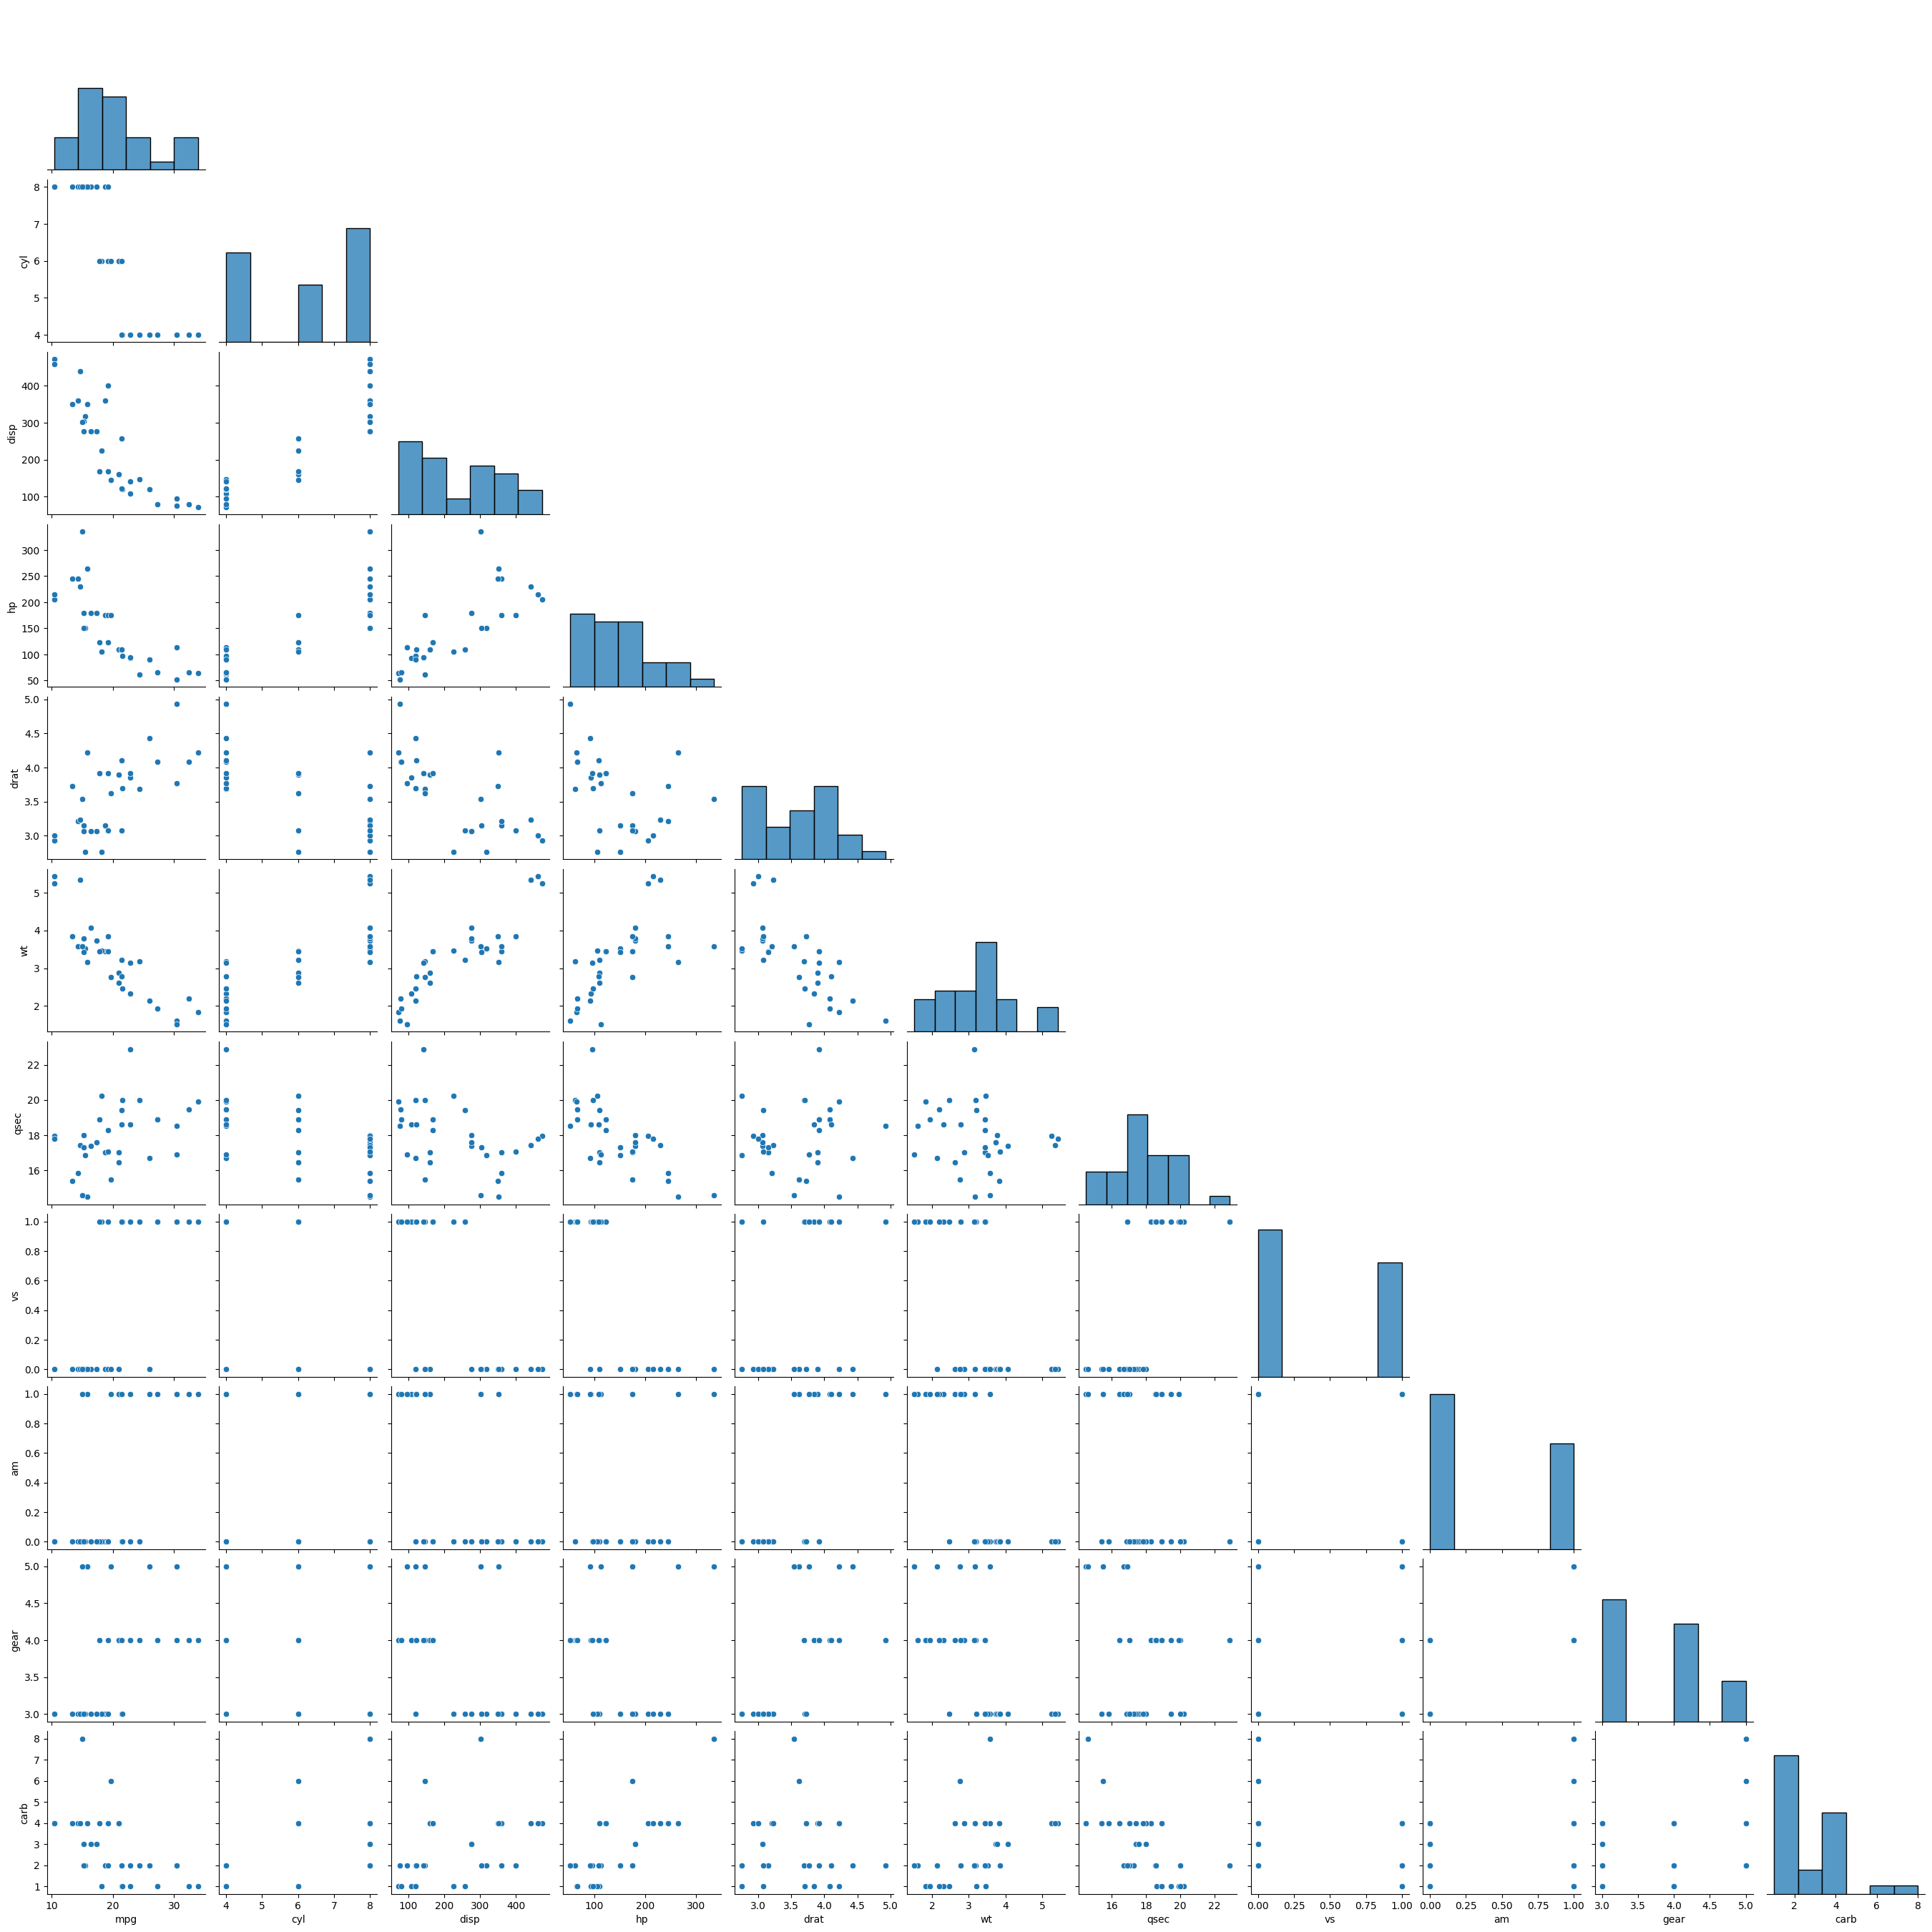

In [20]:
sns.pairplot(cars.drop(columns='model'), corner=True); #el parametro corner=False, True

## 1. Aplicamos modelos de regresión lineal multiple con OLS /minimos cuadrados ordinarios

In [31]:
X = cars[['hp','wt','disp']].to_numpy()
y = cars['mpg'].to_numpy()

In [32]:
#usamos el import de statsmodels.api, tambien se puede hacer con sklearn.linear_model -> LinearRegression
ols_model = sm.OLS(y,X).fit()

In [33]:
ols_model.params

array([ 0.04382227, 12.06390563, -0.11686153])

In [34]:
#R2adj
ols_model.rsquared_adj

0.8155768504930017

In [35]:
ols_model.aic

234.25628315660344

In [36]:
ols_model.bic

238.65349086500262

In [37]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.833
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                              48.17
Date:                Tue, 12 Sep 2023   Prob (F-statistic):                    2.20e-11
Time:                        00:25:08   Log-Likelihood:                         -114.13
No. Observations:                  32   AIC:                                      234.3
Df Residuals:                      29   BIC:                                      238.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0438      0.036      1.212      0.235      -0.030       0.118
x2            12.0639      1.935      6.234      0.000       8.106      16.022
x3            -0.1169      0.027     -4.298      0.000      -0.172      -0.061
==============================================================================
Omnibus:                        2.978   Durbin-Watson:                   0.711
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                1.961
Skew:                           0.398   Prob(JB):                        0.375
Kurtosis:                       2.085   Cond. No.                         370.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
X = cars[['hp','wt','disp','qsec']].to_numpy()
y = cars['mpg'].to_numpy()
ols_model = sm.OLS(y,X).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              379.3
Date:                Tue, 12 Sep 2023   Prob (F-statistic):                    6.06e-24
Time:                        00:25:15   Log-Likelihood:                         -78.579
No. Observations:                  32   AIC:                                      165.2
Df Residuals:                      28   BIC:                                      171.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0174      0.012      1.425      0.165      -0.008       0.043
x2            -6.0467      1.358     -4.452      0.000      -8.829      -3.264
x3             0.0071      0.012      0.581      0.566      -0.018       0.032
x4             1.9758      0.130     15.175      0.000       1.709       2.242
==============================================================================
Omnibus:                        0.124   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.940   Jarque-Bera (JB):                0.193
Skew:                          -0.129   Prob(JB):                        0.908
Kurtosis:                       2.720   Cond. No.                         779.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

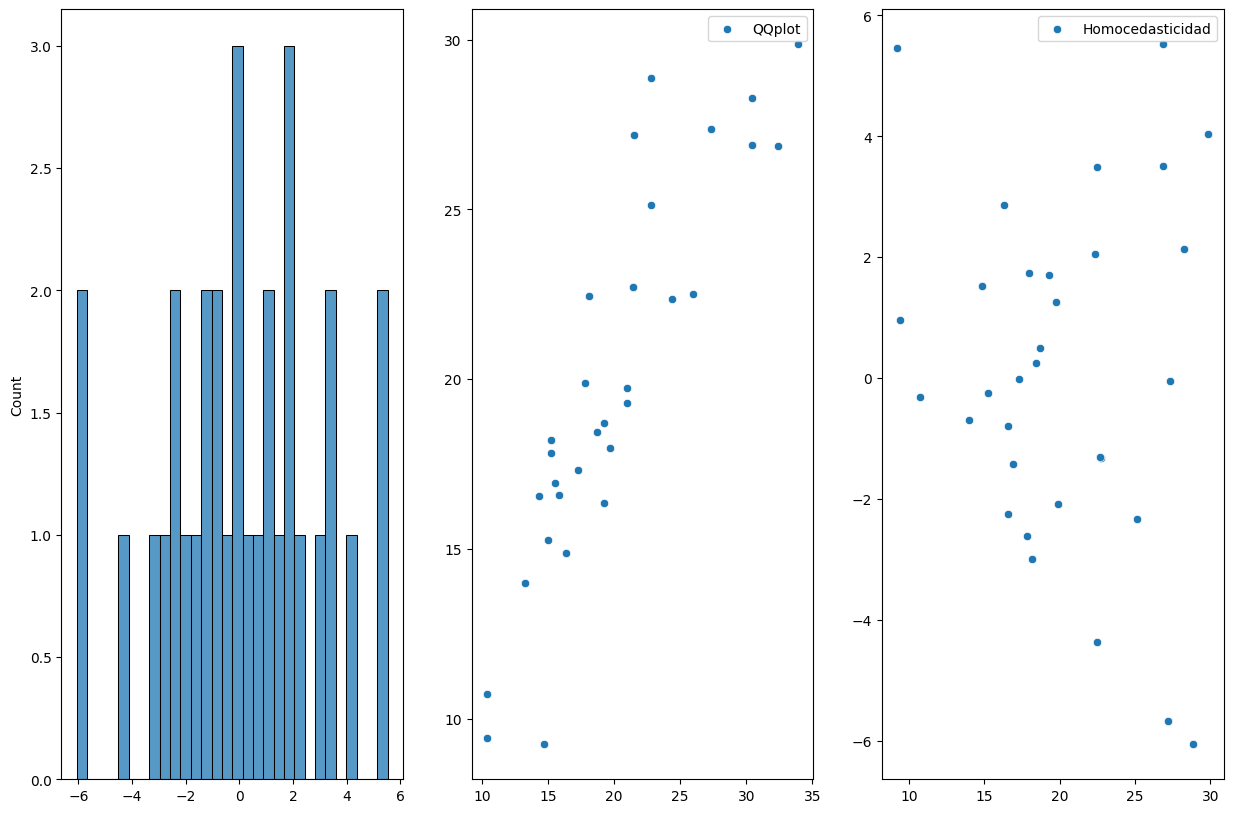

In [39]:
y_pred_ols = ols_model.predict(X)
residuos_ols = y - y_pred_ols

plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
sns.histplot(residuos_ols,bins=30,label="Residuos dist")
plt.subplot(1,3,2)
sns.scatterplot(x=y,y=y_pred_ols,label="QQplot")
plt.subplot(1,3,3)
sns.scatterplot(x=y_pred_ols,y=residuos_ols,label="Homocedasticidad")
plt.legend();

In [40]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X,y)

LinearRegression()

In [41]:
lreg.intercept_ , lreg.coef_

(27.329637966715083,
 array([-1.86662025e-02, -4.60912262e+00,  2.66643109e-03,  5.44160312e-01]))

In [42]:
lreg.score(X,y)

0.8351442754766712

In [43]:
y_pred = lreg.predict(X)
residuos = y-y_pred

In [44]:
from scipy import stats
stats.shapiro(residuos)

ShapiroResult(statistic=0.936613917350769, pvalue=0.060039106756448746)

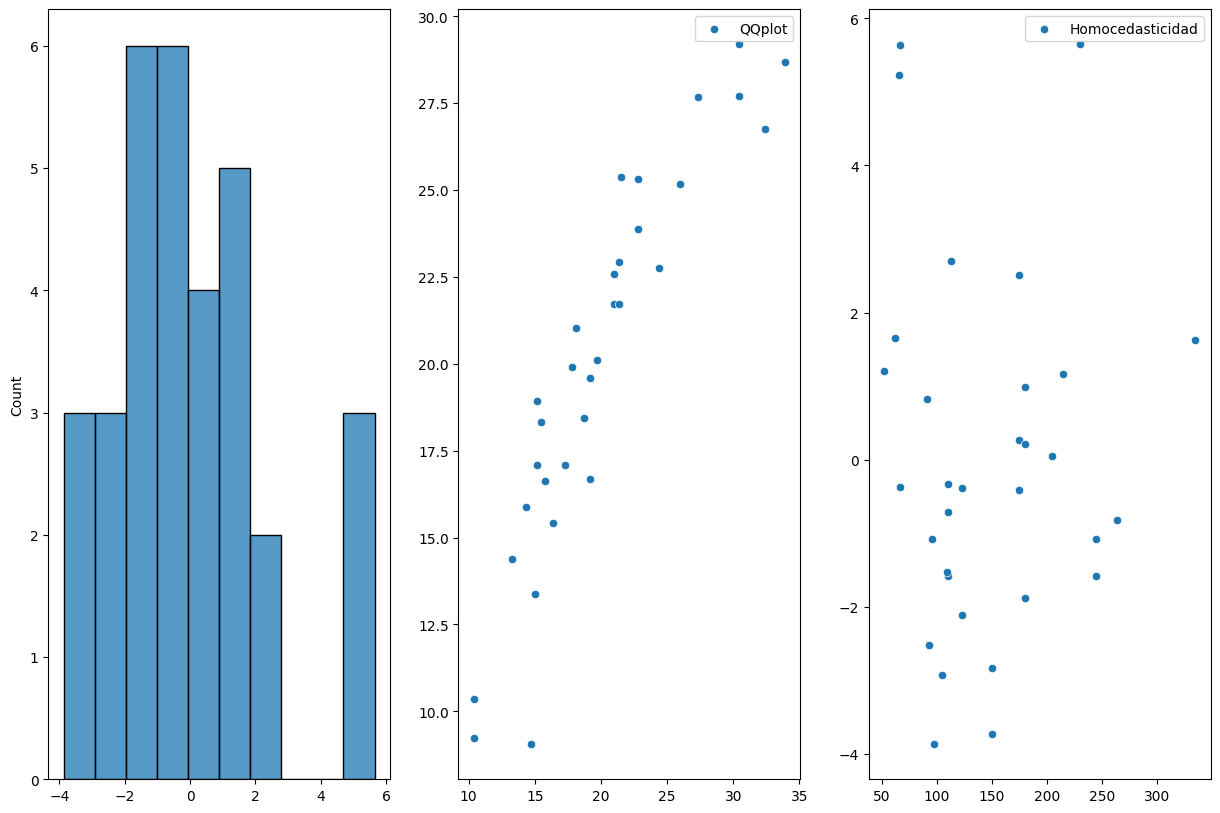

In [45]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
sns.histplot(residuos,bins=10,label="Residuos dist")
plt.subplot(1,3,2)
sns.scatterplot(x=y,y=y_pred,label="QQplot")
plt.subplot(1,3,3)
sns.scatterplot(x=X[:,0],y=residuos,label="Homocedasticidad")
plt.legend();



---



In [46]:
from sklearn.svm import SVR
for i in [0.5,1,2,3,4,5,6,7,8,9,10,15,20]:
  svr = SVR(kernel='rbf',C=i,epsilon=0.8)
  svr.fit(X,y)
  print(f"R2 con parametro C = {i}, score = {svr.score(X,y)}")

R2 con parametro C = 0.5, score = 0.4375336230297616
R2 con parametro C = 1, score = 0.5949818271572074
R2 con parametro C = 2, score = 0.6876373754407803
R2 con parametro C = 3, score = 0.7313194207279836
R2 con parametro C = 4, score = 0.7600842130789636
R2 con parametro C = 5, score = 0.7792819447449824
R2 con parametro C = 6, score = 0.786125046074801
R2 con parametro C = 7, score = 0.79112417322503
R2 con parametro C = 8, score = 0.7983732913040711
R2 con parametro C = 9, score = 0.8125330451501601
R2 con parametro C = 10, score = 0.8340314499541484
R2 con parametro C = 15, score = 0.844622586518028
R2 con parametro C = 20, score = 0.8577865020945017


In [52]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X,y)
print(f"R2 score de Decision Tree: {dtree.score(X,y)}")

R2 score de Decision Tree: 1.0


In [53]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y)

In [54]:
dtree = DecisionTreeRegressor()
dtree.fit(xtrain,ytrain)
print(f"R2 score de Decision Tree en entrenamiento: {dtree.score(xtrain,ytrain)}\n")
print(f"R2 score de Decision Tree en testo: {dtree.score(xtest,ytest)}")

R2 score de Decision Tree en entrenamiento: 1.0

R2 score de Decision Tree en testo: 0.6699124360017226


> Cuando existe varianza significativa entre las metricas de entrenamiento y testeo, significa que hay overfitting.

In [55]:
from sklearn import tree
print(tree.export_text(dtree))

|--- feature_2 <= 101.55
|   |--- feature_2 <= 73.40
|   |   |--- value: [33.90]
|   |--- feature_2 >  73.40
|   |   |--- feature_3 <= 18.71
|   |   |   |--- value: [30.40]
|   |   |--- feature_3 >  18.71
|   |   |   |--- value: [27.30]
|--- feature_2 >  101.55
|   |--- feature_1 <= 3.33
|   |   |--- feature_0 <= 96.00
|   |   |   |--- feature_1 <= 3.17
|   |   |   |   |--- value: [22.80]
|   |   |   |--- feature_1 >  3.17
|   |   |   |   |--- value: [24.40]
|   |   |--- feature_0 >  96.00
|   |   |   |--- feature_0 <= 142.50
|   |   |   |   |--- feature_3 <= 18.23
|   |   |   |   |   |--- value: [21.00]
|   |   |   |   |--- feature_3 >  18.23
|   |   |   |   |   |--- feature_3 <= 19.73
|   |   |   |   |   |   |--- value: [21.40]
|   |   |   |   |   |--- feature_3 >  19.73
|   |   |   |   |   |   |--- value: [21.50]
|   |   |   |--- feature_0 >  142.50
|   |   |   |   |--- value: [19.70]
|   |--- feature_1 >  3.33
|   |   |--- feature_0 <= 205.00
|   |   |   |--- feature_3 <= 16.95
|  

In [56]:
#Observamos cómo el max_depth afecta la performance del árbol
from sklearn.datasets import make_regression
X_reg , y_reg = make_regression(n_samples=1000,n_features=1,noise=10,bias=0.8)

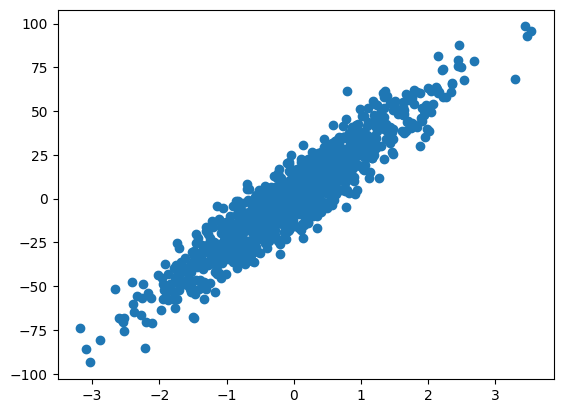

In [57]:
plt.scatter(X_reg,y_reg)

In [58]:
dtree_2 = DecisionTreeRegressor(max_depth=2)
dtree_2.fit(X_reg,y_reg)
print(f"R2 score de Decision Tree max_depth 2: {dtree_2.score(X_reg,y_reg)}\n")

R2 score de Decision Tree max_depth 2: 0.7792845432619301



In [59]:
dtree_5 = DecisionTreeRegressor(max_depth=5)
dtree_5.fit(X_reg,y_reg)
print(f"R2 score de Decision Tree max_depth 5: {dtree_5.score(X_reg,y_reg)}\n")

R2 score de Decision Tree max_depth 5: 0.8928660360344205



In [60]:
dtree_full = DecisionTreeRegressor()
dtree_full.fit(X_reg,y_reg)
print(f"R2 score de Decision Tree max_depth_full: {dtree_full.score(X_reg,y_reg)}\n")

R2 score de Decision Tree max_depth_full: 1.0



In [61]:
y_pred_2 = dtree_2.predict(X_reg)
y_pred_5 = dtree_5.predict(X_reg)
y_pred_full = dtree_full.predict(X_reg)

In [62]:
X_reg.shape,y_pred_2.shape

((1000, 1), (1000,))

In [63]:
X_reg = np.squeeze(X_reg)

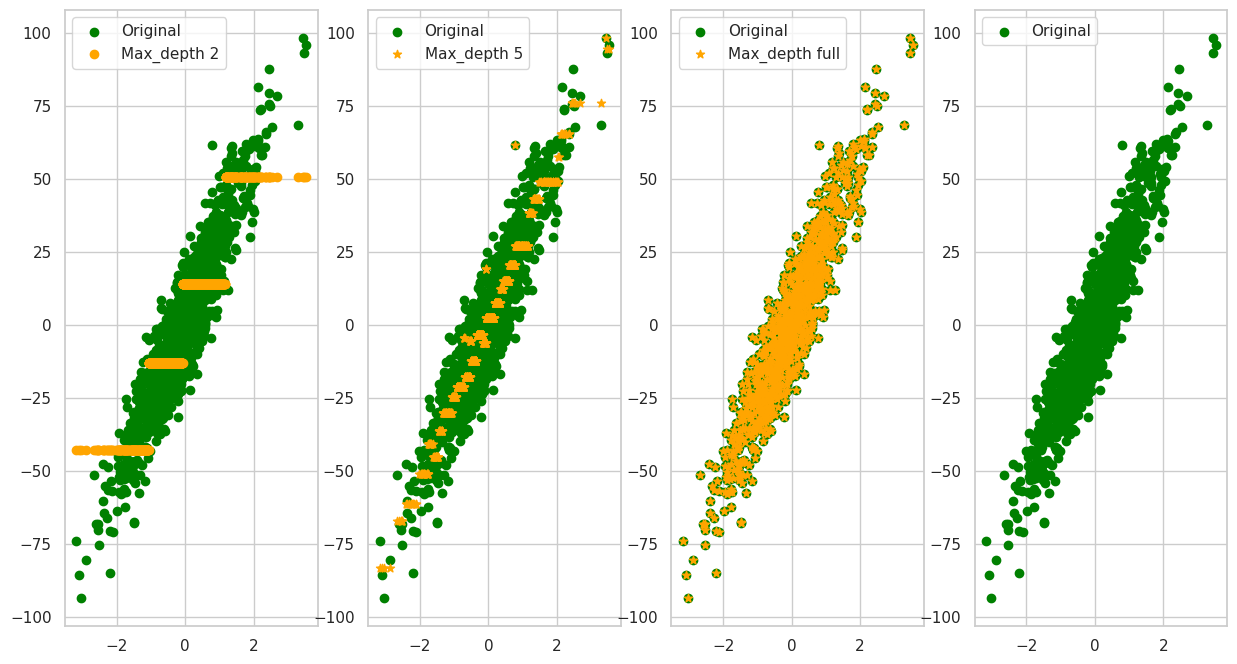

In [64]:
sns.set_theme(style='whitegrid',palette='bright')

fig, axs = plt.subplots(1, 4, figsize=(15, 8))
axs[0].scatter(x=X_reg, y=y_reg,c='green' ,label='Original')
axs[0].scatter(x=X_reg, y=y_pred_2, c='orange', label='Max_depth 2')
axs[0].legend()
axs[1].scatter(x=X_reg, y=y_reg,c='green' ,label='Original')
axs[1].scatter(x=X_reg, y=y_pred_5, c='orange',marker='*',label='Max_depth 5')
axs[1].legend()
axs[2].scatter(x=X_reg, y=y_reg,c='green' ,label='Original')
axs[2].scatter(x=X_reg, y=y_pred_full,c='orange' ,marker='*',label='Max_depth full')
axs[2].legend()
axs[3].scatter(x=X_reg, y=y_reg,c='green' ,label='Original')
axs[3].legend();


In [65]:
#Probamos con un nuevo conjunto de datos
from sklearn.datasets import make_regression
X_new , y_new = make_regression(n_samples=1000,n_features=1,noise=1)

In [66]:
y_new_5 = dtree_5.predict(X_new)
y_new_full = dtree_full.predict(X_new)

In [67]:
X_new = np.squeeze(X_new)

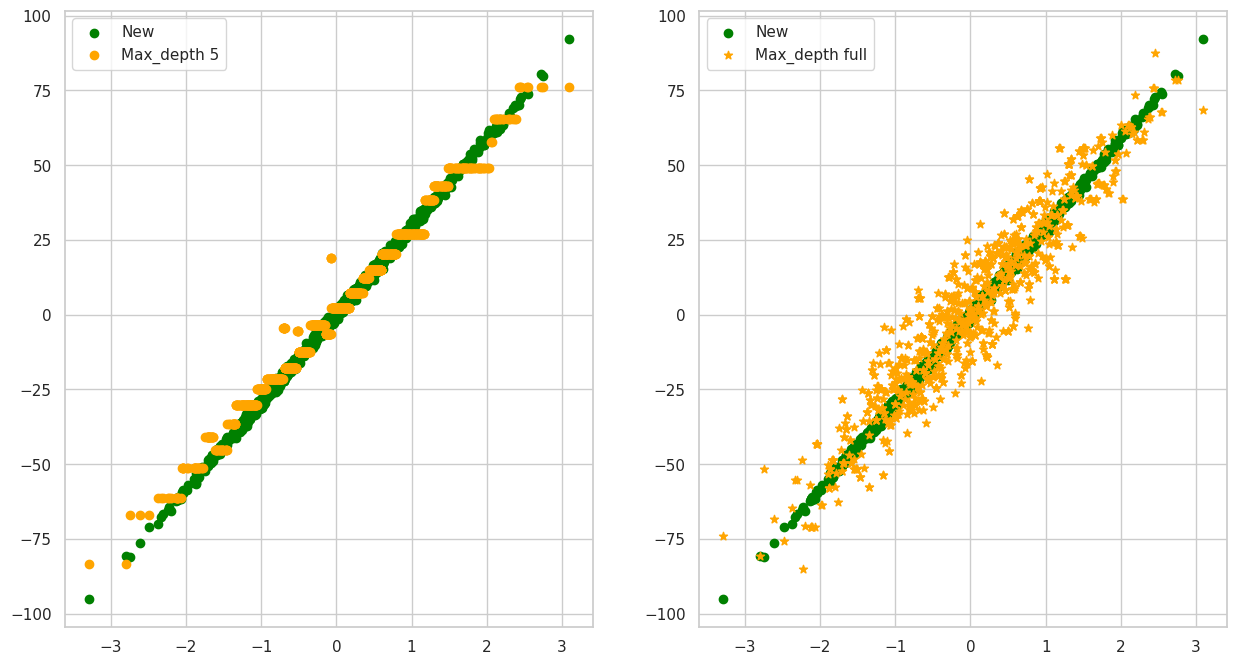

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
axs[0].scatter(x=X_new, y=y_new,c='green' ,label='New')
axs[0].scatter(x=X_new, y=y_new_5, c='orange', label='Max_depth 5')
axs[0].legend()
axs[1].scatter(x=X_new, y=y_new,c='green' ,label='New')
axs[1].scatter(x=X_new, y=y_new_full, c='orange',marker='*',label='Max_depth full')
axs[1].legend();